<a href="https://colab.research.google.com/github/nafizfouad/BizNLP-A-Way-to-Change-the-Face-of-Business/blob/main/main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/dataset/amazon_electronics.csv')

Mounted at /content/drive


In [ ]:
# Code for Sentimental Analysis

# Start

# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

data['sentiment'] = np.where(data['star_rating'] == 5.0, 1,
                           np.where(data['star_rating'] == 4.0, 1, 0))

# get unique values of product title column
data["product_title"].unique()


array(['yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable',
       'Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor',
       'Channel Master Titan 2 Antenna Preamplifier', ...,
       'Removable Car Stereo Faceplate Case (Discontinued by Manufacturer)',
       'Interact 62057 CD Jewel Box Replacement Cases (10-Pack)',
       'JVC RX-668 Audio/Video Receiver'], dtype=object)

In [ ]:
# Grouping by 'product_title' and counting occurrences
title_counts = data['product_title'].value_counts()

# Getting the maximum count and corresponding product title
max_count = title_counts.max()
most_common_title = title_counts.idxmax()

print("Most common product title:", most_common_title)
print("Number of occurrences:", max_count)

Most common product title: Panasonic ErgoFit In-Ear Earbud Headphone
Number of occurrences: 24809


In [ ]:
prod_hosa = data.loc[data["product_title"]=='Panasonic ErgoFit In-Ear Earbud Headphone']
prod_hosa

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
45,US,10051428,R315Z1T26EA8YK,B003EM6AQE,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,0,0,N,Y,Great In-Ear Headphones!,I LOVE THESE HEADPHONES! I am totally satisfie...,2015-08-31,1
326,US,6646484,R11TJI8ZDD8X1R,B003EM8008,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,0,0,N,Y,Good quality head phones!,Probably the best earphones ever. Better than ...,2015-08-31,1
361,US,24595086,R1SECPCXGCQ9I0,B003EM6AOG,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,0,0,N,Y,Not bad at all!,"Great headphones, I mean they aren't going to ...",2015-08-31,1
397,US,2273028,R1RYYQ1AFKHP73,B00E4LGVUO,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,0,0,N,Y,Five Stars,I love them for their price and quality.,2015-08-31,1
557,US,107946,R5RKDQ37LWIQW,B003EM8008,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,0,0,N,N,I love these!,I love these earphones! They're very good for ...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668271,US,24363208,R29HK7107DK4WK,B003EM8008,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,4,29,37,N,Y,Very Happy:),"I read the other review and was concerned, but...",2010-12-03,1
2678582,US,24024401,R3TLP02CLCYYQ6,B003ELYQGG,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,5,15,20,N,Y,One of the best values found for earbuds!,"These are comfortable, have good sound quality...",2010-11-05,1
2686951,US,38881339,R2034F30FMAX27,B003EM800S,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,3,0,0,N,N,Only Fair,"Well, the price is right for these, they are i...",2010-10-12,0
2689293,US,35640941,R1B9HZKTQRCK54,B003EM8008,921315865,Panasonic ErgoFit In-Ear Earbud Headphone,Electronics,2,6,12,N,N,Not to be Confused with RP-HJE160-K ErgoFit In...,So I bought these thinking they would be the s...,2010-10-05,0


In [ ]:
# #split data-set to train and test

X = prod_hosa['review_body']
Y = prod_hosa['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()
    return clean_HTML

In [ ]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)
    return clean_SpecialChar

In [ ]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))

In [ ]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [ ]:
# X_training clean set
nltk.download('stopwords')
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_train_cleaned.append(val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-8-c2a805237a43>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [ ]:
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val)

<ipython-input-8-c2a805237a43>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of
# raw strings.
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

In [ ]:
# Define the Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr', C=1.0, loss='squared_hinge', dual=False)

# Perform 4-fold cross-validation
kf_4 = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_4, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_4 = pd.DataFrame(index=range(1, 5))
cv_results_4['Accuracy'] = cv_scores_4
cv_results_4['Precision'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_4, scoring='precision_macro')
cv_results_4['Recall'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_4, scoring='recall_macro')
cv_results_4['F1 Score'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_4, scoring='f1_macro')

# Print 4-fold cross-validation results
print("4-Fold Cross-Validation Results:")
print(cv_results_4)

# Calculate and print mean scores for 4-fold cross-validation
print("\nMean Scores for 4-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_4.mean())
print("Mean Precision:", cv_results_4['Precision'].mean())
print("Mean Recall:", cv_results_4['Recall'].mean())
print("Mean F1 Score:", cv_results_4['F1 Score'].mean())

# Perform 10-fold cross-validation
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_10 = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_10, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_10 = pd.DataFrame(index=range(1, 11))
cv_results_10['Accuracy'] = cv_scores_10
cv_results_10['Precision'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_10, scoring='precision_macro')
cv_results_10['Recall'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_10, scoring='recall_macro')
cv_results_10['F1 Score'] = cross_val_score(svr_lin, X_train_tvec, Y_train, cv=kf_10, scoring='f1_macro')

# Print 10-fold cross-validation results
print("\n10-Fold Cross-Validation Results:")
print(cv_results_10)

# Calculate and print mean scores for 10-fold cross-validation
print("\nMean Scores for 10-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_10.mean())
print("Mean Precision:", cv_results_10['Precision'].mean())
print("Mean Recall:", cv_results_10['Recall'].mean())
print("Mean F1 Score:", cv_results_10['F1 Score'].mean())



4-Fold Cross-Validation Results:
   Accuracy  Precision    Recall  F1 Score
1  0.910520   0.841014  0.783295  0.807982
2  0.916163   0.858720  0.777990  0.810656
3  0.914954   0.855722  0.778129  0.809732
4  0.900826   0.831024  0.761650  0.789866

Mean Scores for 4-Fold Cross-Validation:
Mean Accuracy: 0.910615720800397
Mean Precision: 0.8466199794099376
Mean Recall: 0.7752660503264353
Mean F1 Score: 0.8045591519844051

10-Fold Cross-Validation Results:
    Accuracy  Precision    Recall  F1 Score
1   0.920907   0.867841  0.811610  0.836066
2   0.910831   0.835020  0.784195  0.806364
3   0.905290   0.838765  0.767585  0.796613
4   0.925441   0.882492  0.789369  0.826497
5   0.910831   0.840407  0.763102  0.794317
6   0.920403   0.848431  0.784038  0.811423
7   0.911839   0.873032  0.767084  0.806684
8   0.909778   0.838345  0.789331  0.810799
9   0.912298   0.847926  0.793296  0.816923
10  0.899698   0.838001  0.758351  0.789659

Mean Scores for 10-Fold Cross-Validation:
Mean Accuracy:

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
svr_lin.fit(X_train_tvec, Y_train)
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(4)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.727900,0.598300,0.656800,702.000000
1,0.935700,0.963100,0.949200,4260.000000
accuracy,0.911500,0.911500,0.911500,0.911500
macro avg,0.831800,0.780700,0.803000,4962.000000
weighted avg,0.906300,0.911500,0.907800,4962.000000


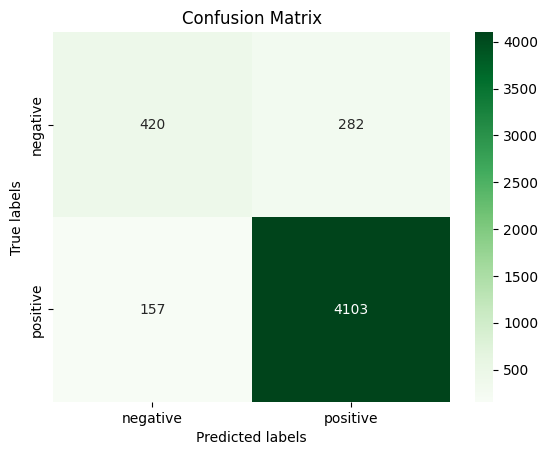

In [ ]:
# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(svr_lin.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [ ]:
# Random Forest model
random_forest = RandomForestClassifier(n_estimators=20,random_state=42)

# Perform 4-fold cross-validation
kf_4 = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_4, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_4 = pd.DataFrame(index=range(1, 5))
cv_results_4['Accuracy'] = cv_scores_4
cv_results_4['Precision'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_4, scoring='precision_macro')
cv_results_4['Recall'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_4, scoring='recall_macro')
cv_results_4['F1 Score'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_4, scoring='f1_macro')

# Print 4-fold cross-validation results
print("4-Fold Cross-Validation Results:")
print(cv_results_4)

# Calculate and print mean scores for 4-fold cross-validation
print("\nMean Scores for 4-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_4.mean())
print("Mean Precision:", cv_results_4['Precision'].mean())
print("Mean Recall:", cv_results_4['Recall'].mean())
print("Mean F1 Score:", cv_results_4['F1 Score'].mean())

# Perform 10-fold cross-validation
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_10 = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_10, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_10 = pd.DataFrame(index=range(1, 11))
cv_results_10['Accuracy'] = cv_scores_10
cv_results_10['Precision'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_10, scoring='precision_macro')
cv_results_10['Recall'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_10, scoring='recall_macro')
cv_results_10['F1 Score'] = cross_val_score(random_forest, X_train_tvec, Y_train, cv=kf_10, scoring='f1_macro')

# Print 10-fold cross-validation results
print("\n10-Fold Cross-Validation Results:")
print(cv_results_10)

# Calculate and print mean scores for 10-fold cross-validation
print("\nMean Scores for 10-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_10.mean())
print("Mean Precision:", cv_results_10['Precision'].mean())
print("Mean Recall:", cv_results_10['Recall'].mean())
print("Mean F1 Score:", cv_results_10['F1 Score'].mean())


4-Fold Cross-Validation Results:
   Accuracy  Precision    Recall  F1 Score
1  0.876260   0.869803  0.599046  0.630766
2  0.880089   0.860624  0.605188  0.639717
3  0.879484   0.864663  0.604672  0.638971
4  0.867970   0.851744  0.591098  0.617681

Mean Scores for 4-Fold Cross-Validation:
Mean Accuracy: 0.8759506232450275
Mean Precision: 0.8617085886994895
Mean Recall: 0.6000011954770916
Mean F1 Score: 0.6317837538360113

10-Fold Cross-Validation Results:
    Accuracy  Precision    Recall  F1 Score
1   0.872040   0.849508  0.603674  0.635549
2   0.888161   0.864579  0.638882  0.682929
3   0.884635   0.897702  0.634134  0.678099
4   0.874559   0.806114  0.586620  0.612888
5   0.879093   0.840992  0.595180  0.625923
6   0.889673   0.849138  0.612178  0.650568
7   0.875567   0.866036  0.619911  0.657416
8   0.880040   0.856163  0.625249  0.664674
9   0.876512   0.842178  0.622635  0.660171
10  0.864919   0.861173  0.591338  0.617209

Mean Scores for 10-Fold Cross-Validation:
Mean Accuracy

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
random_forest.fit(X_train_tvec, Y_train)
ranfrst_predictions = random_forest.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(4)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.789500,0.213700,0.336300,702.000000
1,0.884300,0.990600,0.934500,4260.000000
accuracy,0.880700,0.880700,0.880700,0.880700
macro avg,0.836900,0.602100,0.635400,4962.000000
weighted avg,0.870900,0.880700,0.849800,4962.000000


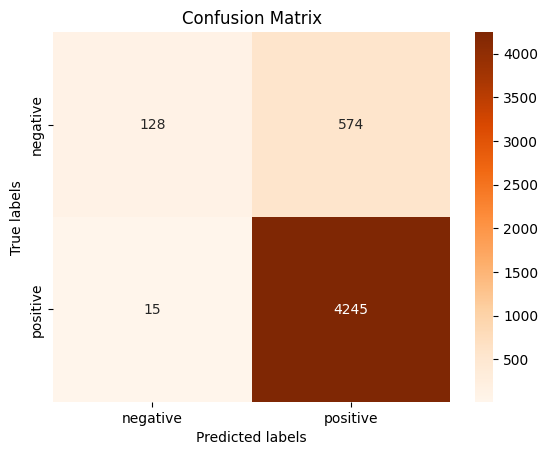

In [ ]:
# confusion matrix
ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Do not buy. Fake Product.'])
demo_review_X_test = tvec.transform(demo_review)
print(random_forest.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Original Product. Great Performance.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(random_forest.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [ ]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')

# Perform 4-fold cross-validation
kf_4 = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_4, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_4 = pd.DataFrame(index=range(1, 5))
cv_results_4['Accuracy'] = cv_scores_4
cv_results_4['Precision'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_4, scoring='precision_macro')
cv_results_4['Recall'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_4, scoring='recall_macro')
cv_results_4['F1 Score'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_4, scoring='f1_macro')

# Print 4-fold cross-validation results
print("4-Fold Cross-Validation Results:")
print(cv_results_4)

# Calculate and print mean scores for 4-fold cross-validation
print("\nMean Scores for 4-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_4.mean())
print("Mean Precision:", cv_results_4['Precision'].mean())
print("Mean Recall:", cv_results_4['Recall'].mean())
print("Mean F1 Score:", cv_results_4['F1 Score'].mean())

# Perform 10-fold cross-validation
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_10 = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_10, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_10 = pd.DataFrame(index=range(1, 11))
cv_results_10['Accuracy'] = cv_scores_10
cv_results_10['Precision'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_10, scoring='precision_macro')
cv_results_10['Recall'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_10, scoring='recall_macro')
cv_results_10['F1 Score'] = cross_val_score(knn, X_train_tvec, Y_train, cv=kf_10, scoring='f1_macro')

# Print 10-fold cross-validation results
print("\n10-Fold Cross-Validation Results:")
print(cv_results_10)

# Calculate and print mean scores for 10-fold cross-validation
print("\nMean Scores for 10-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_10.mean())
print("Mean Precision:", cv_results_10['Precision'].mean())
print("Mean Recall:", cv_results_10['Recall'].mean())
print("Mean F1 Score:", cv_results_10['F1 Score'].mean())



4-Fold Cross-Validation Results:
   Accuracy  Precision    Recall  F1 Score
1  0.851673   0.814792  0.504486  0.469220
2  0.855905   0.837085  0.505997  0.473382
3  0.854696   0.864831  0.504696  0.470292
4  0.846200   0.823170  0.507414  0.473485

Mean Scores for 4-Fold Cross-Validation:
Mean Accuracy: 0.8521184099336372
Mean Precision: 0.8349698308249442
Mean Recall: 0.5056483639289755
Mean F1 Score: 0.4715947436754143

10-Fold Cross-Validation Results:
    Accuracy  Precision    Recall  F1 Score
1   0.846348   0.723485  0.504306  0.467968
2   0.854912   0.760932  0.503165  0.467698
3   0.848866   0.924281  0.506579  0.472026
4   0.860453   0.858804  0.510345  0.483136
5   0.859446   0.829798  0.506799  0.476061
6   0.867506   0.833838  0.507228  0.479210
7   0.843829   0.755382  0.502917  0.463973
8   0.850302   0.825215  0.506370  0.472574
9   0.850302   0.834332  0.514207  0.487920
10  0.840222   0.753576  0.502845  0.462770

Mean Scores for 10-Fold Cross-Validation:
Mean Accuracy

In [ ]:
#Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(X_train_tvec, Y_train)
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(4)
cm = sns.light_palette("gray", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.571400,0.005700,0.011300,702.000000
1,0.859100,0.999300,0.923900,4260.000000
accuracy,0.858700,0.858700,0.858700,0.858700
macro avg,0.715300,0.502500,0.467600,4962.000000
weighted avg,0.818400,0.858700,0.794800,4962.000000


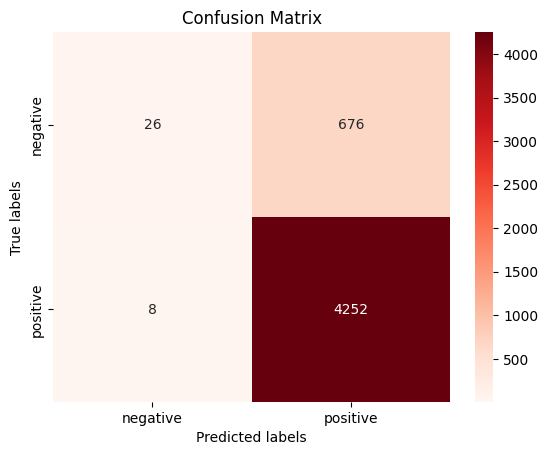

In [ ]:
# confusion matrix
knn_predictions=knn.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Bad product. Very much disappointed'])
demo_review_X_test = tvec.transform(demo_review)
print(knn.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(knn.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [ ]:
# Define the Logistic Regression model
logistic_classifier = LogisticRegression(random_state=42)

# Perform 4-fold cross-validation
kf_4 = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_4 = pd.DataFrame(index=range(1, 5))
cv_results_4['Accuracy'] = cv_scores_4
cv_results_4['Precision'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='precision_macro')
cv_results_4['Recall'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='recall_macro')
cv_results_4['F1 Score'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='f1_macro')

# Print 4-fold cross-validation results
print("4-Fold Cross-Validation Results for Logistic Regression Classifier:")
print(cv_results_4)

# Calculate and print mean scores for 4-fold cross-validation
print("\nMean Scores for 4-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_4.mean())
print("Mean Precision:", cv_results_4['Precision'].mean())
print("Mean Recall:", cv_results_4['Recall'].mean())
print("Mean F1 Score:", cv_results_4['F1 Score'].mean())

# Perform 10-fold cross-validation
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_10 = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_10 = pd.DataFrame(index=range(1, 11))
cv_results_10['Accuracy'] = cv_scores_10
cv_results_10['Precision'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='precision_macro')
cv_results_10['Recall'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='recall_macro')
cv_results_10['F1 Score'] = cross_val_score(logistic_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='f1_macro')

# Print 10-fold cross-validation results
print("\n10-Fold Cross-Validation Results for Logistic Regression Classifier:")
print(cv_results_10)

# Calculate and print mean scores for 10-fold cross-validation
print("\nMean Scores for 10-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_10.mean())
print("Mean Precision:", cv_results_10['Precision'].mean())
print("Mean Recall:", cv_results_10['Recall'].mean())
print("Mean F1 Score:", cv_results_10['F1 Score'].mean())


4-Fold Cross-Validation Results for Logistic Regression Classifier:
   Accuracy  Precision    Recall  F1 Score
1  0.905885   0.878521  0.718820  0.768062
2  0.907295   0.880264  0.714192  0.764469
3  0.906086   0.877760  0.713117  0.762908
4  0.894779   0.866169  0.695201  0.742901

Mean Scores for 4-Fold Cross-Validation:
Mean Accuracy: 0.9035114257999985
Mean Precision: 0.875678511455515
Mean Recall: 0.7103324549056766
Mean F1 Score: 0.7595848303619692

10-Fold Cross-Validation Results for Logistic Regression Classifier:
    Accuracy  Precision    Recall  F1 Score
1   0.908312   0.881269  0.738692  0.785879
2   0.907809   0.865911  0.727885  0.773735
3   0.909320   0.895092  0.730893  0.781993
4   0.915365   0.886431  0.737634  0.786988
5   0.907809   0.873079  0.712518  0.761848
6   0.914861   0.868200  0.728407  0.775478
7   0.902771   0.889363  0.715891  0.766680
8   0.904738   0.871864  0.723353  0.770652
9   0.903730   0.865609  0.728963  0.774068
10  0.894657   0.879182  0.6981

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tvec, Y_train)
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(4)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.833300,0.477200,0.606900,702.000000
1,0.919500,0.984300,0.950800,4260.000000
accuracy,0.912500,0.912500,0.912500,0.912500
macro avg,0.876400,0.730700,0.778800,4962.000000
weighted avg,0.907300,0.912500,0.902100,4962.000000


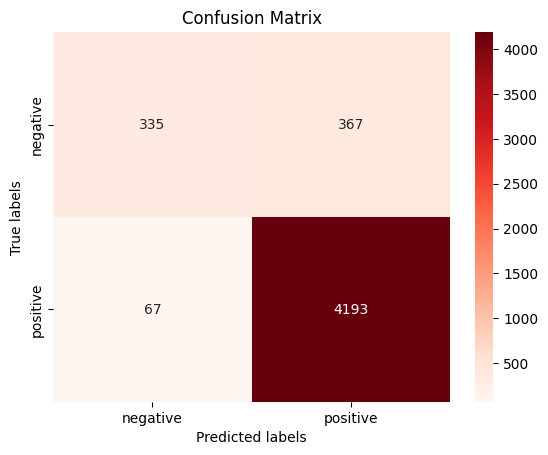

In [ ]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Poor quality. Faulty device.'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Best product.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the Multinomial Naive Bayes classifier model
nb_classifier = MultinomialNB()

# Perform 4-fold cross-validation
kf_4 = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_4 = pd.DataFrame(index=range(1, 5))
cv_results_4['Accuracy'] = cv_scores_4
cv_results_4['Precision'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='precision_macro')
cv_results_4['Recall'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='recall_macro')
cv_results_4['F1 Score'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_4, scoring='f1_macro')

# Print 4-fold cross-validation results
print("4-Fold Cross-Validation Results for Multinomial Naive Bayes Classifier:")
print(cv_results_4)

# Calculate and print mean scores for 4-fold cross-validation
print("\nMean Scores for 4-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_4.mean())
print("Mean Precision:", cv_results_4['Precision'].mean())
print("Mean Recall:", cv_results_4['Recall'].mean())
print("Mean F1 Score:", cv_results_4['F1 Score'].mean())

# Perform 10-fold cross-validation
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_10 = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='accuracy')

# Create a DataFrame to store cross-validation results
cv_results_10 = pd.DataFrame(index=range(1, 11))
cv_results_10['Accuracy'] = cv_scores_10
cv_results_10['Precision'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='precision_macro')
cv_results_10['Recall'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='recall_macro')
cv_results_10['F1 Score'] = cross_val_score(nb_classifier, X_train_tvec, Y_train, cv=kf_10, scoring='f1_macro')

# Print 10-fold cross-validation results
print("\n10-Fold Cross-Validation Results for Multinomial Naive Bayes Classifier:")
print(cv_results_10)

# Calculate and print mean scores for 10-fold cross-validation
print("\nMean Scores for 10-Fold Cross-Validation:")
print("Mean Accuracy:", cv_scores_10.mean())
print("Mean Precision:", cv_results_10['Precision'].mean())
print("Mean Recall:", cv_results_10['Recall'].mean())
print("Mean F1 Score:", cv_results_10['F1 Score'].mean())


NameError: name 'KFold' is not defined

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
nbm = MultinomialNB()
nbm.fit(X_train_tvec, Y_train)
nbm_predictions = nbm.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(4)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,1.000000,0.012800,0.025300,702.000000
1,0.860100,1.000000,0.924800,4260.000000
accuracy,0.860300,0.860300,0.860300,0.860300
macro avg,0.930000,0.506400,0.475000,4962.000000
weighted avg,0.879900,0.860300,0.797500,4962.000000


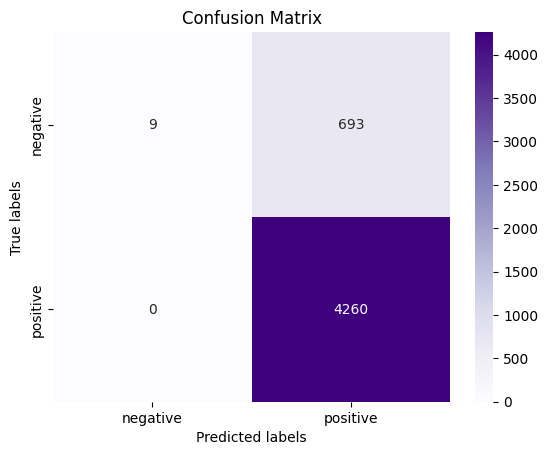

In [ ]:
# confusion matrix
nbm_predictions=nbm.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Defective. Bad. Stopped working after one day use'])
demo_review_X_test = tvec.transform(demo_review)
print(nbm.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Good product. highly recommend buying.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(nbm.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]
